In [1]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from keras.preprocessing import image
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# To show image within the notebook
%matplotlib inline

Using TensorFlow backend.


## Loading Train dataset

In [2]:
train_df = pd.read_csv('Train.csv')

In [3]:
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [4]:
len(train_df)

39209

In [5]:
# loading input images
train_image = []

for i in tqdm(range(train_df.shape[0])):
    img = image.load_img(train_df['Path'][i], target_size=(28,28,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 39209/39209 [00:09<00:00, 4174.66it/s]


In [6]:
# target
y = train_df['ClassId'].values
y = to_categorical(y)

## Images & Labels

Train/5/00005_00050_00020.png


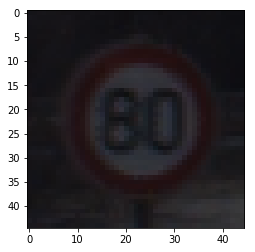

In [7]:
img_num = 9950
img = plt.imread(train_df["Path"][img_num])
plt.imshow(img)
print(train_df["Path"][img_num])

## Validation set

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2)

## Dataset exploration

## Keras Model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [10]:
model = Sequential()
#first layer - input_shape is necessary
model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))

In [11]:
#compiling
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 31367 samples, validate on 7842 samples
Epoch 1/10
31367/31367 [==============================] - 7s 220us/step - loss: 0.7396 - acc: 0.8048 - val_loss: 0.1531 - val_acc: 0.9611
Epoch 2/10
31367/31367 [==============================] - 5s 167us/step - loss: 0.1228 - acc: 0.9659 - val_loss: 0.1635 - val_acc: 0.9563
Epoch 3/10
31367/31367 [==============================] - 5s 144us/step - loss: 0.0589 - acc: 0.9836 - val_loss: 0.0868 - val_acc: 0.9768
Epoch 4/10
31367/31367 [==============================] - 4s 134us/step - loss: 0.0406 - acc: 0.9887 - val_loss: 0.0772 - val_acc: 0.9797
Epoch 5/10
31367/31367 [==============================] - 4s 137us/step - loss: 0.0306 - acc: 0.9914 - val_loss: 0.0719 - val_acc: 0.9832
Epoch 6/10
31367/31367 [==============================] - 4s 131us/step - loss: 0.0231 - acc: 0.9939 - val_loss: 0.0508 - val_acc: 0.9861
Epoch 7/10
31367/31367 [==============================] - 4s 131us/step - loss: 0.0234 - acc: 0.9936 - val_loss: 0.0666 - v

## Test dataset

In [13]:
test_df = pd.read_csv('Test.csv')

In [14]:
test_image = []

for i in tqdm(range(test_df.shape[0])):
    img = image.load_img(test_df['Path'][i], target_size=(28,28,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X_test = np.array(test_image)

100%|██████████| 12630/12630 [00:03<00:00, 3256.42it/s]


In [15]:
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [16]:
test_paths = test_df["Path"]

In [17]:
y_test = test_df['ClassId'].values
y_test = to_categorical(y_test)

In [18]:
# making predictions
model.fit(X, y, epochs=10, validation_data=(X_test, y_test))

Train on 39209 samples, validate on 12630 samples
Epoch 1/10
39209/39209 [==============================] - 6s 145us/step - loss: 0.0265 - acc: 0.9933 - val_loss: 0.3450 - val_acc: 0.9420
Epoch 2/10
39209/39209 [==============================] - 6s 145us/step - loss: 0.0106 - acc: 0.9974 - val_loss: 0.3399 - val_acc: 0.9438
Epoch 3/10
39209/39209 [==============================] - 6s 147us/step - loss: 0.0117 - acc: 0.9969 - val_loss: 0.5033 - val_acc: 0.9240
Epoch 4/10
39209/39209 [==============================] - 6s 145us/step - loss: 0.0147 - acc: 0.9960 - val_loss: 0.2932 - val_acc: 0.9508
Epoch 5/10
39209/39209 [==============================] - 5s 136us/step - loss: 0.0074 - acc: 0.9981 - val_loss: 0.3268 - val_acc: 0.9409
Epoch 6/10
39209/39209 [==============================] - 5s 135us/step - loss: 0.0092 - acc: 0.9977 - val_loss: 0.3105 - val_acc: 0.9439
Epoch 7/10
39209/39209 [==============================] - 6s 141us/step - loss: 0.0121 - acc: 0.9970 - val_loss: 0.3452 - 

In [21]:
#making predictions
prediction = model.predict_classes(X_test)

In [22]:
# creating prediction file
pred_df = pd.DataFrame()
pred_df["Img_Path"] = test_paths
pred_df["Prediction"] = prediction
pred_df.to_csv('pred.csv', header=True, index=False)

In [26]:
pred = pd.read_csv("pred.csv")
pred.head()

,Img_Path,Prediction
0,Test/00000.png,16
1,Test/00001.png,1
2,Test/00002.png,38
3,Test/00003.png,33
4,Test/00004.png,11


The actual class is : 4
The predicted class is : 4


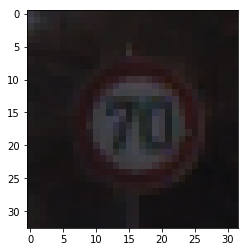

In [27]:
img_num = 20
img = plt.imread(test_df["Path"][img_num])
plt.imshow(img)
print("The actual class is :", test_df["ClassId"][img_num])
print("The predicted class is :", pred["Prediction"][20] )